In [41]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
data['species'] = data['species'].map({'setosa':0,'versicolor':1,'virginica':3})
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


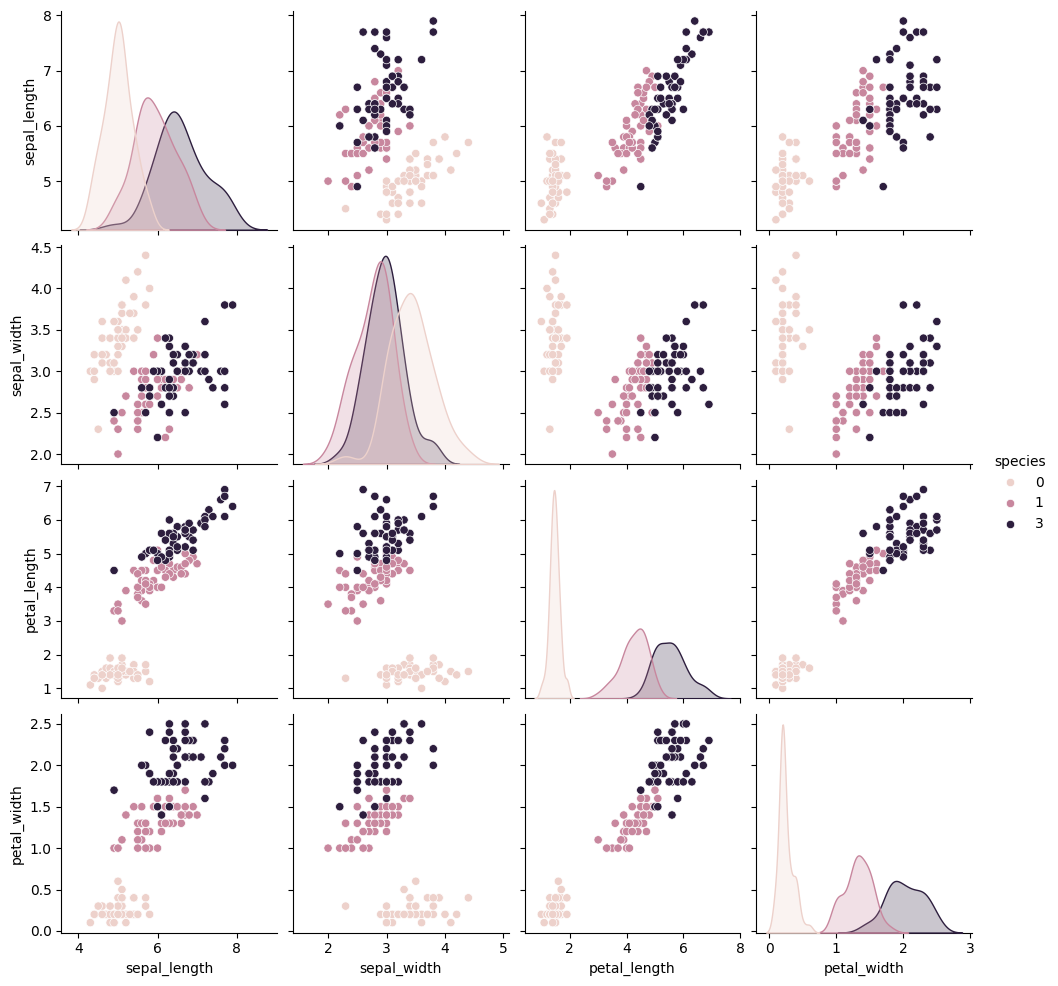

In [44]:
sns.pairplot(data, hue='species')

<Axes: >

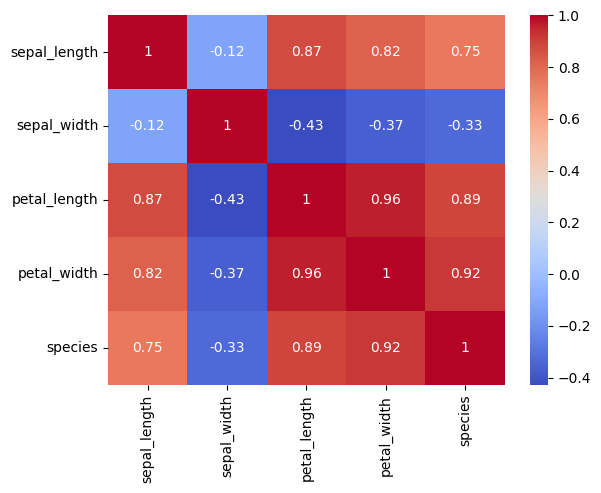

In [45]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [46]:
X = data.drop('species', axis=1)
y = data['species']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

In [49]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

1.0


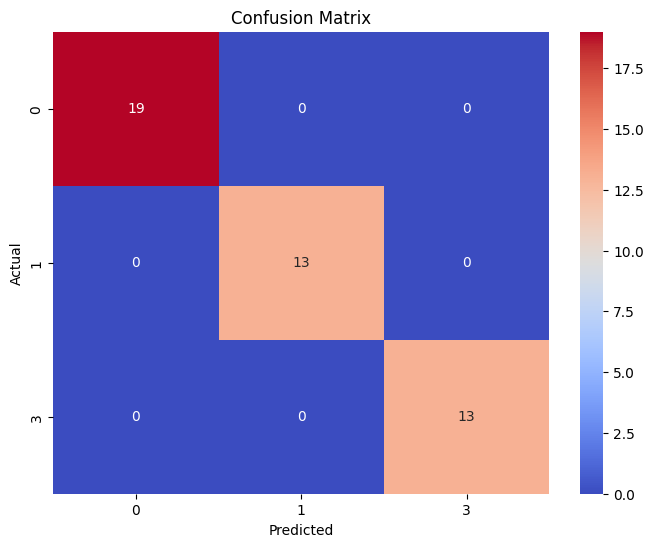

In [50]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [52]:
import joblib
joblib.dump(model, 'iris_model.pkl')

['iris_model.pkl']

In [53]:
sample = np.array([[5.1,	3.5,	1.4,	0.2]])
prediction = model.predict(sample)

classes = {0:'setosa', 1:'versicolor', 2:'virginica'}
print("Predicted class:", classes[prediction[0]])

Predicted class: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
import json

loaded_model = joblib.load("iris_model.pkl")

def predict_api(input_json):
    """
    Simulates how a web API would handle input data.
    input_json format:
    {"features": [sepal_length, sepal_width, petal_length, petal_width]}
    """
    data = json.loads(input_json)
    features = np.array(data["features"]).reshape(1, -1)
    pred = loaded_model.predict(features)[0]
    return {"prediction": classes[pred]}

input_data = json.dumps({"features": [6.1, 2.8, 4.7, 1.2]})
output = predict_api(input_data)
print(output)


{'prediction': 'versicolor'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
